# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
#import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

# EDA

In [4]:
#check information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check descriptive statistics
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


there are no outliers and No null values


In [6]:
#Renaming columns
data=data.rename({'R&D Spend':'RD','Administration':'ADM','Marketing Spend':'MKS'},axis=1)
data.head()

,RD,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#check for duplicate values
data[data.duplicated()]

,RD,ADM,MKS,State,Profit


There are no Duplicate values

# Correlation Analysis

In [8]:
#checking correlation
data.corr()

,RD,ADM,MKS,Profit
RD,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


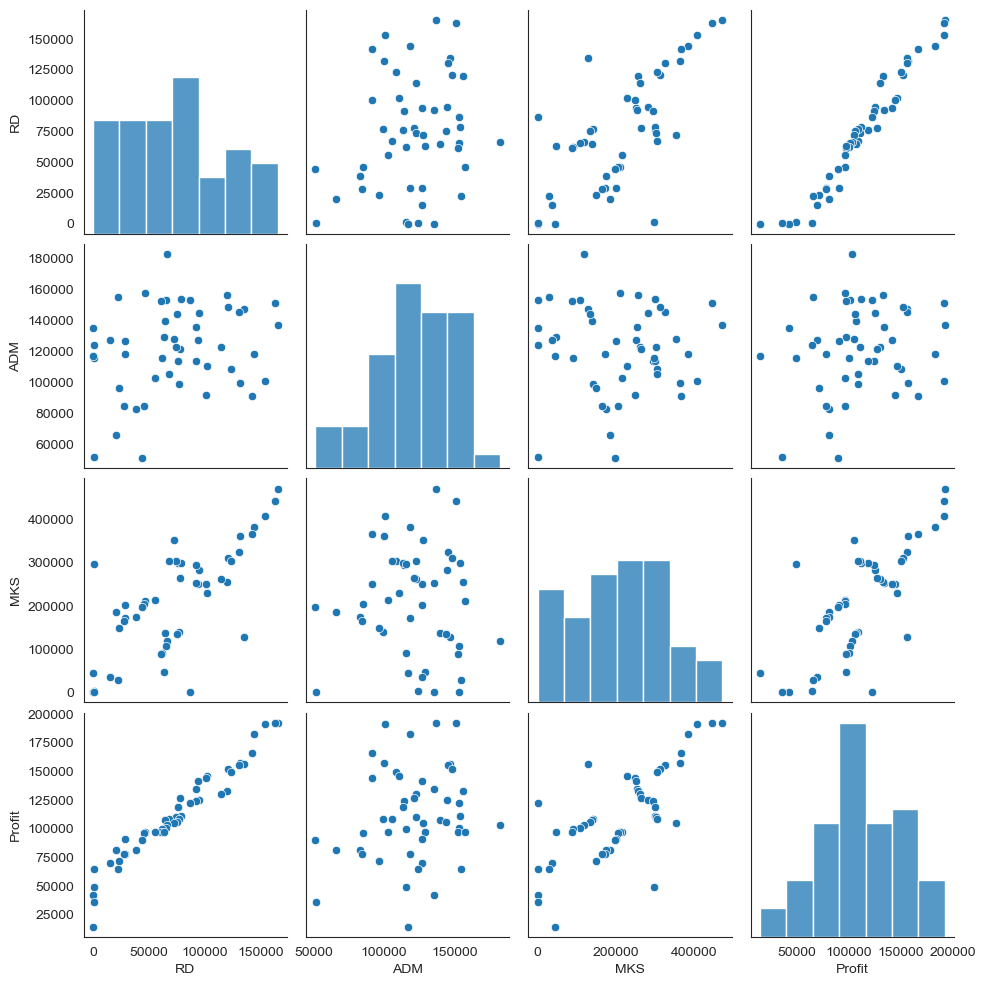

In [9]:
#scatterplot between variables along with histogram
sns.set_style(style='white')
sns.pairplot(data)

# Preparing Model

In [10]:
#model building
model=smf.ols('Profit~RD+ADM+MKS',data=data).fit()
model


In [11]:
#finding coefficients
model.params

Intercept    50122.192990
RD               0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [12]:
#finding t-values and p_values
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 ADM          -0.525507
 MKS           1.655077
 dtype: float64,
 Intercept    0.00000
 RD           0.00000
 ADM          0.60176
 MKS          0.10472
 dtype: float64)

In [13]:
# R-squared values
model.rsquared,model.rsquared_adj
#when adj_rsquared is greater than rsquqred we add irrelevant feature

(0.9507459940683246, 0.9475337762901719)

Variable 'ADM' & 'MKS' have insignificant pvalues.

Here the p value for Administration and Marketing Spend is > 0.05, build simple linear regression and multi linear regression models to see pvalues of 'ADMS' & 'MKTS'.

In [14]:
# simple linear regression to check pvalue of 'ADM'
slr_a=smf.ols('Profit~ADM',data=data).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    3.040044
 ADM          1.419493
 dtype: float64,
 Intercept    0.003824
 ADM          0.162217
 dtype: float64)

ADM have in-significant pvalue

In [15]:
# simple linear regression to check pvalue of 'MKS'
slr_a=smf.ols('Profit~MKS',data=data).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    7.808356
 MKS          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKS          4.381073e-10
 dtype: float64)

MKS have Significant pvalue

In [16]:
#multi-linear regression to check p valu of both 'ADM' & 'MKS'
mlr_am=smf.ols('Profit~ADM+MKS',data=data).fit()
mlr_am.tvalues, mlr_am.pvalues

(Intercept    1.142741
 ADM          2.467779
 MKS          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADM          1.729198e-02
 MKS          9.727245e-11
 dtype: float64)

here for both the varibles have significant pvalues

when we calculate p value of ADM & MKS separetly the pvalue of ADM is less than 0.05 bt when we calculate p values together then value is greater than 0.05 means both the features are important

# Model validation techinques


## Two techinques
### 1. Collinearity Check (VIF) ~ Variable Inflation Factor

In [17]:
# 1) Collinearity Problem Check
# Detecting multicolinearity using vif
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_rds=smf.ols('RD~ADM+MKS',data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adms=smf.ols('ADM~RD+MKS',data=data).fit().rsquared
vif_adms=1/(1-rsq_adms)

rsq_mkts=smf.ols('MKS~RD+ADM',data=data).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

# Storing vif values in a data frame
d1 = {'Variables':['RD','ADM','MKS'],'VIF':[vif_rds,vif_adms,vif_mkts]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,ADM,1.175091
2,MKS,2.326773


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we will consider all columns(features) for building the model

### 2. Residual analysis
### Test for Normality of Residuals (Q-Q Plot)

In [29]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [30]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


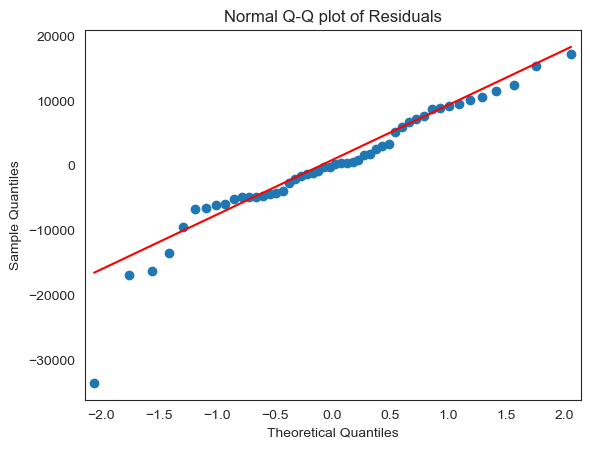

In [31]:
#Q-Q plot
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [24]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

## Residual Plot for Homoscedasticity or Heteroscedasticity ( Error vs Target)

In [26]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standardized_values (vals):
    return (vals-vals.mean())/vals.std()


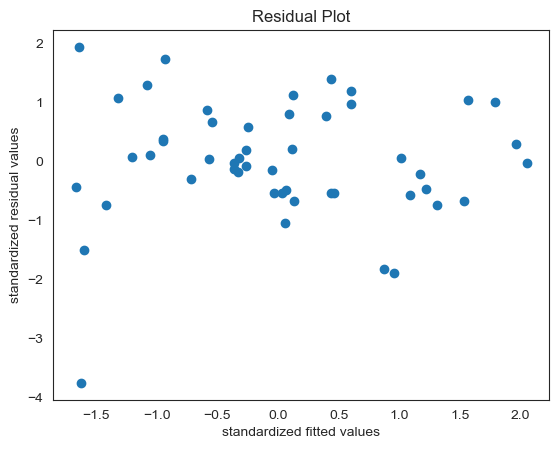

In [27]:
plt.scatter(standardized_values(model.fittedvalues),standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values'),
plt.ylabel('standardized residual values')
plt.show()

Error VS Target should have no pattern, Error vs target distriburion should be homoscedastic.

Currently The plot between Error and Target is Homoscedastic.

## Residual Vs Regressors ( Error vs Features)


eval_env: 1


<Figure size 1500x800 with 0 Axes>

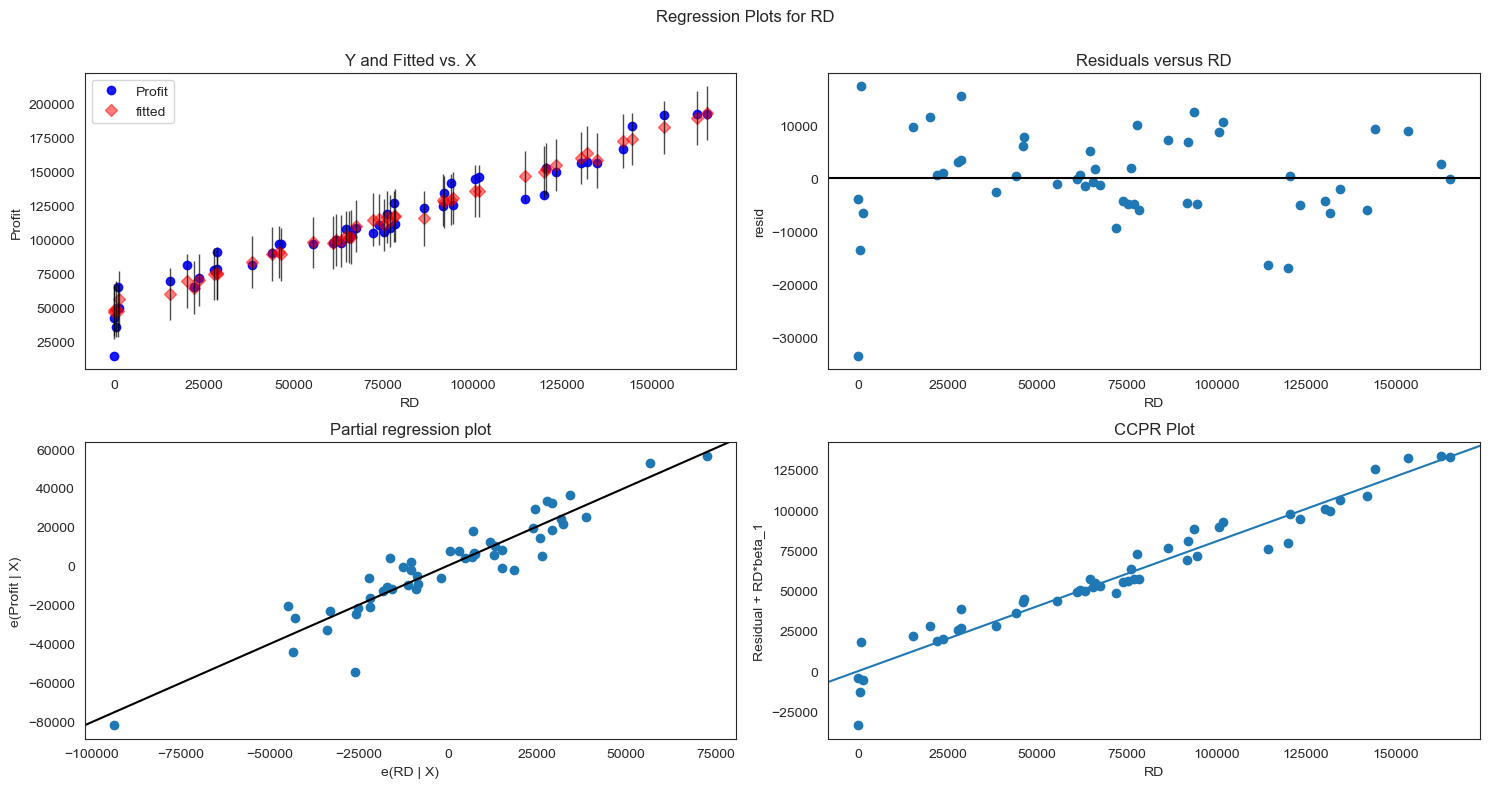

In [33]:
# Test for errors or Residuals Vs Regressors(variables or predictors) 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

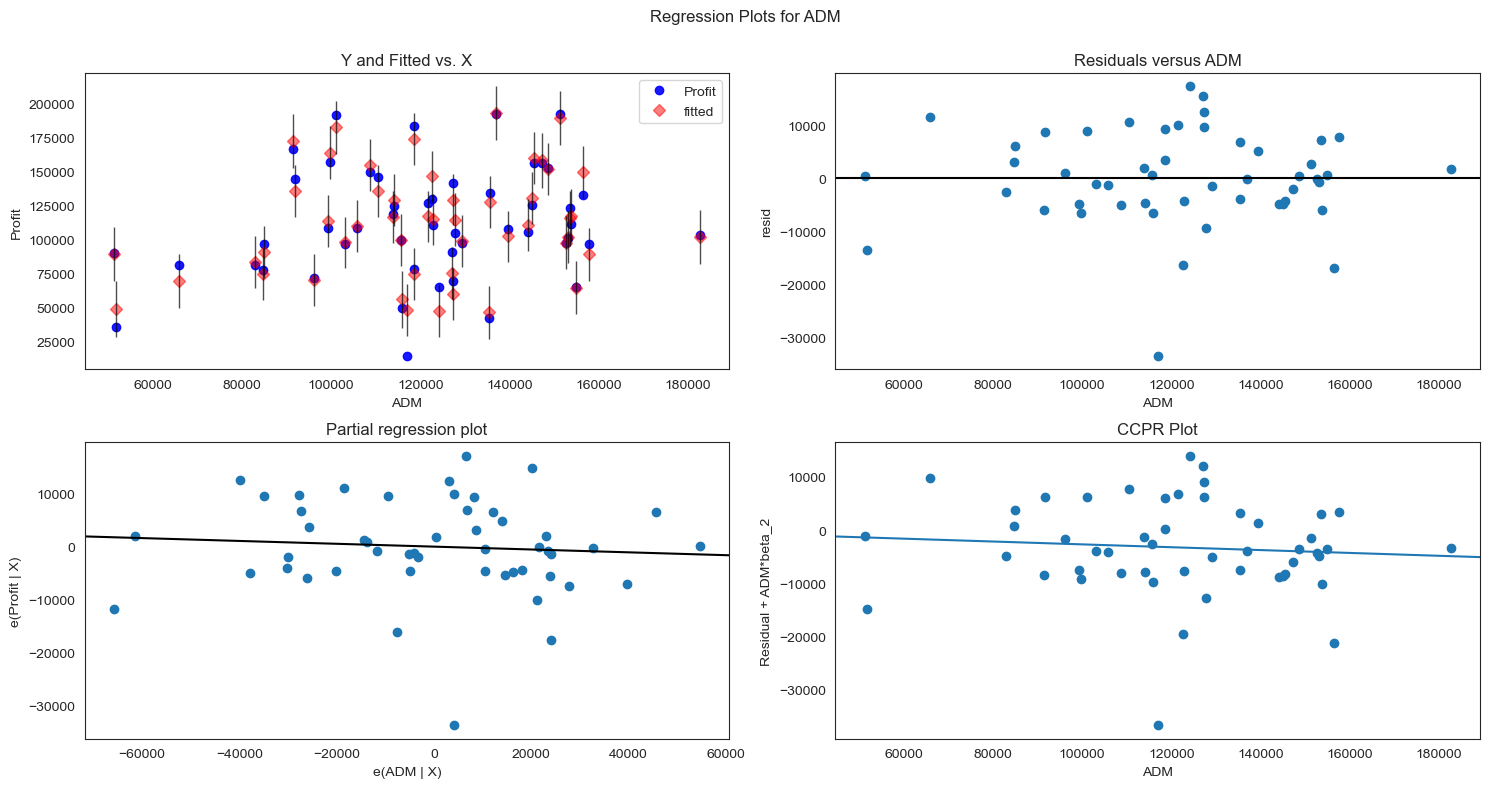

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

eval_env: 1


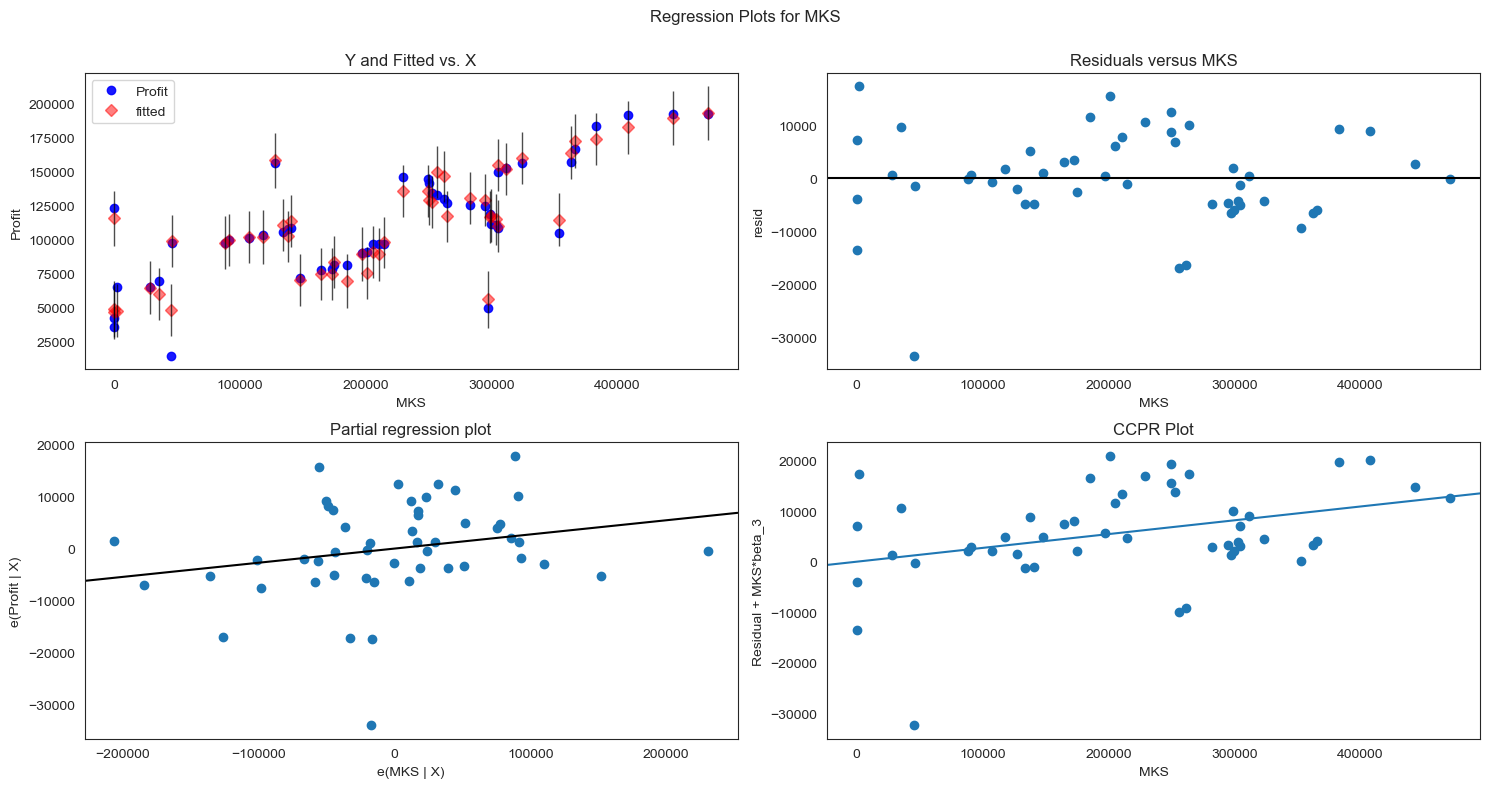

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKS',fig=fig)
plt.show()

Error VS Feature should have no pattern, Error vs Feature distriburion should be homoscedastic.

Currently The plot between Error and Feature for all the Three cases is Homoscedastic. There is no pattern betwwen Error & Features

## Model Deletion Diagnostics (checking Outliers or Influencers in ROWS)
### Two Techniques :
### 1. Cook's Distance (Work On Rows)

In [37]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance #.cooks_distance this atribute detect outlier with respect to the Rows..
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

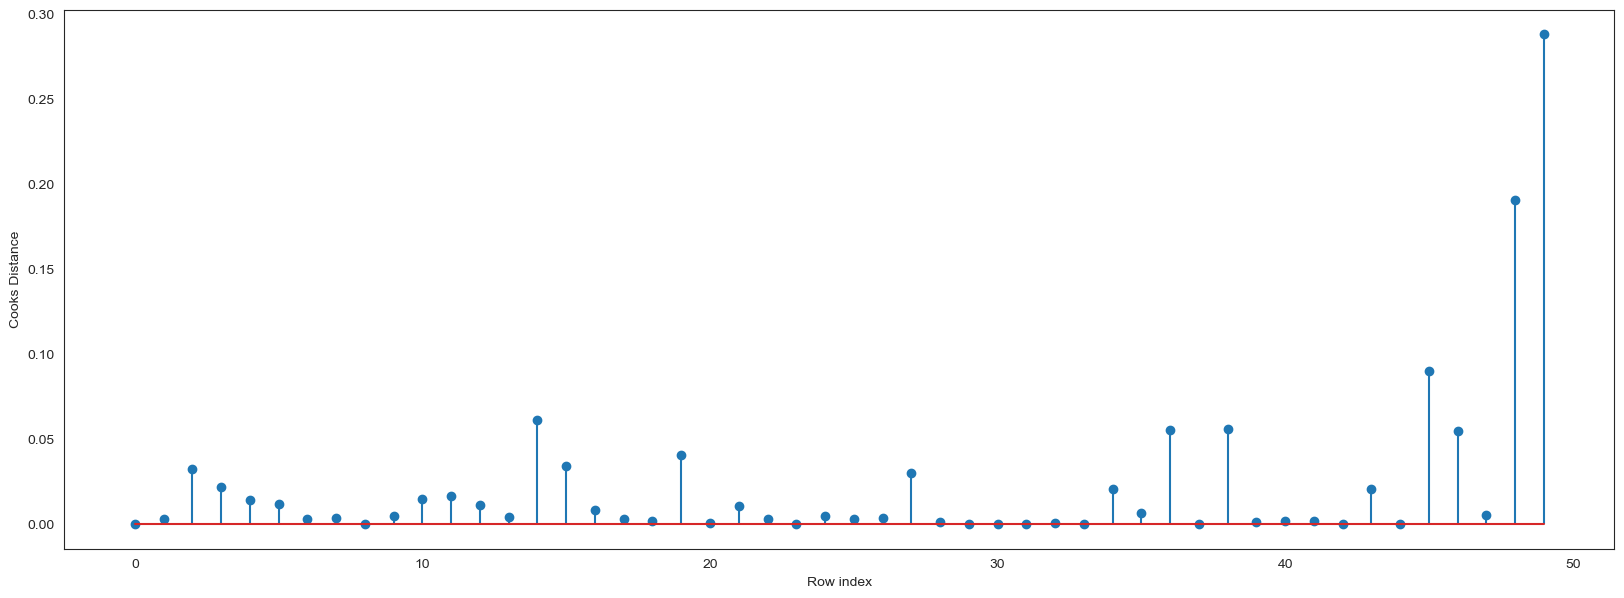

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 5))  # np.round(c, 5) -> it roundup the values in 3 digits
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

There are no outliers because all the distances are less than 1.

### 2. Leverage value

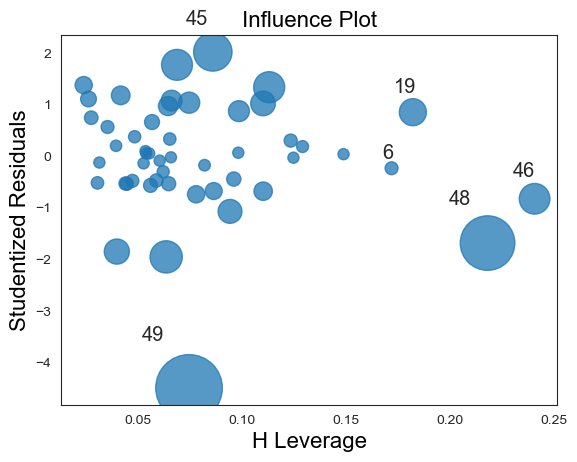

In [40]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [41]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

From the above plot, it is evident that data point 49 is the influencer.

In [42]:
data[data.index.isin([49])]

,RD,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


 # Improving the model

In [43]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1

,RD,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [45]:
Final_Model = smf.ols('Profit~RD+ADM+MKS',data=data1).fit()
# R-squared values
Final_Model.rsquared,Final_Model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

After treating Influencer the Rsquared value is Increased

The model Accuracy is 96.1%

# Model Predictions

In [48]:
# New data for prediction is
new_data=pd.DataFrame({'RD':70000,"ADM":90000,"MKS":140000},index=[0])
new_data


,RD,ADM,MKS
0,70000,90000,140000


In [49]:
# Manual Prediction of Price
Final_Model.predict(new_data)

0    108727.154753
dtype: float64

In [50]:
# Automatic Prediction of Price 
pred_y=Final_Model.predict(data1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table containing R^2 value for each prepared model

In [51]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,Final_Model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
